In [11]:
import torch
import gradientUtils as gu
# Define a threshold for early stopping
threshold = 1e-6
circle_center = torch.tensor([5.0, 5.0])  # Example circle center
radius = 3.0  # Example radius
alpha = 0.1  # Learning rate
delta = 1e-5

In [12]:
def autograd(s_i, s_j, s_k, destination):
    # Define an optimizer
    optimizer = torch.optim.Adam([s_i, s_j, s_k], lr=0.01)
    # Previous loss
    prev_loss = float("inf")
    # Training loop
    for epoch in range(1000):
        
        # Zero the gradients
        optimizer.zero_grad()

        # Compute the vertex
        x, y = gu.compute_vertex(s_i, s_j, s_k)
        loss = gu.circle_sdf(x,y)**2
        loss.backward()
        # Optimization step
        optimizer.step()

        #grad_x, grad_y = gu.approximate_gradient(X.detach().numpy(), Y.detach().numpy(), circle_center, radius)
       
        # with torch.no_grad():
        #     s_i.x -= alpha * torch.tensor([grad_x])
        #     s_i.y -= alpha * torch.tensor([grad_y])
        #     s_j.x -= alpha * torch.tensor([grad_x])
        #     s_j.y -= alpha * torch.tensor([grad_y])
        #     s_k.x -= alpha * torch.tensor([grad_x])
        #     s_k.y -= alpha * torch.tensor([grad_y])

        # Print the loss
        if epoch % 100 == 0:
            print(f"Epoch {epoch}", f"Loss: {loss.item()}")
            gu.plot_and_save(
                epoch, s_i, s_j, s_k, circle_center, radius, destination=destination
            )

    # Print the final site coordinates
    # print(f"Final site coordinates:")
    # print(f"s_i: ({s_i.x.item()}, {s_i.y.item()})")
    # print(f"s_j: ({s_j.x.item()}, {s_j.y.item()})")
    # print(f"s_k: ({s_k.x.item()}, {s_k.y.item()})")

    # Compute the final vertex
    final_X, final_Y = gu.compute_vertex(s_i, s_j, s_k)

    # Print the final vertex coordinates
    #print(f"Final vertex coordinates: ({final_X.item()}, {final_Y.item()})")
    return s_i, s_j, s_k

In [13]:
# # Initialize the sites
# s_i = gu.Site(1.0, 1.0)
# s_j = gu.Site(2.0, 2.0)
# s_k = gu.Site(1.50, 2.750)

# Initialize the source points (p1, p2, p3) as PyTorch tensors
s_i = torch.tensor([2.0, 2.0], requires_grad=True)
s_j = torch.tensor([-2.0, 2.0], requires_grad=True)
s_k = torch.tensor([0.0, -2.0], requires_grad=True)

destination = "images/autograd/circlesdf/"

# Compute the vertex
x, y = gu.compute_vertex(s_i, s_j, s_k)
# Compute the closest point on the circle to the initial vertex
#X_g, Y_g = gu.compute_closest_point_on_circle(X, Y , circle_center, radius)    

s_i, s_j, s_k = autograd(s_i, s_j, s_k, destination)


Epoch 0 Loss: 13.889126777648926
Epoch 100 Loss: 5.323596477508545
Epoch 200 Loss: 1.843484878540039
Epoch 300 Loss: 0.4943884611129761
Epoch 400 Loss: 0.09574685245752335
Epoch 500 Loss: 0.013058716431260109
Epoch 600 Loss: 0.001258612028323114
Epoch 700 Loss: 8.640121086500585e-05
Epoch 800 Loss: 4.208050995657686e-06
Epoch 900 Loss: 1.4388666613740497e-07


Step 0, Point: [ 0.90000004 -1.9       ], Loss: 1.5278640985488892
Step 100, Point: [-0.6514186 -0.7533931], Loss: 1.5744080883450806e-05
Step 200, Point: [-0.65521556 -0.7554528 ], Loss: 2.3283064365386963e-10
Step 300, Point: [-0.6552076  -0.75544876], Loss: 1.4210854715202004e-14
Step 400, Point: [-0.6552078  -0.75544876], Loss: 0.0
Step 500, Point: [-0.6552078  -0.75544876], Loss: 0.0
Step 600, Point: [-0.6552078  -0.75544876], Loss: 0.0
Step 700, Point: [-0.6552078  -0.75544876], Loss: 0.0
Step 800, Point: [-0.6552078  -0.75544876], Loss: 0.0
Step 900, Point: [-0.6552078  -0.75544876], Loss: 0.0
Optimized Point: [-0.6552078  -0.75544876]


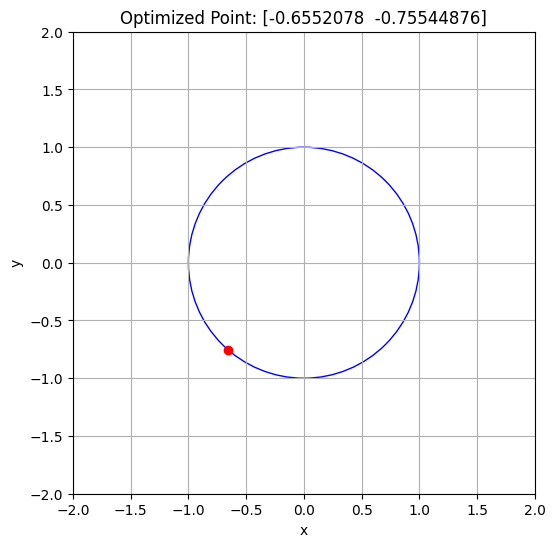

In [14]:
import torch
import matplotlib.pyplot as plt

# Define the SDF for a circle with radius 1 centered at the origin
def sdf_circle(xy):
    x, y = xy
    radius = 1.0
    return torch.sqrt(x**2 + y**2) - radius

# Initialize the point (x, y) as a PyTorch tensor with gradients enabled
xy = torch.tensor([1.0, -2.0], requires_grad=True)

# Define the optimizer
optimizer = torch.optim.Adam([xy], lr=0.1)

# Optimization loop
for step in range(1000):
    optimizer.zero_grad()
    
    # Calculate the SDF value at the current point
    distance = sdf_circle(xy)
    
    # Define the loss as the absolute value of the distance (distance^2 for better gradient flow)
    loss = distance**2
    
    # Backpropagation
    loss.backward()
    
    # Optimization step
    optimizer.step()
    
    # Print progress every 100 steps
    if step % 100 == 0:
        print(f'Step {step}, Point: {xy.detach().numpy()}, Loss: {loss.item()}')

# Final optimized point
optimized_point = xy.detach().numpy()
print(f'Optimized Point: {optimized_point}')

# Plot the result
plt.figure(figsize=(6, 6))
circle = plt.Circle((0, 0), 1, color='blue', fill=False)
plt.gca().add_artist(circle)
plt.plot(optimized_point[0], optimized_point[1], 'ro')  # Final optimized point
plt.xlim(-2, 2)
plt.ylim(-2, 2)
plt.gca().set_aspect('equal', adjustable='box')
plt.title(f'Optimized Point: {optimized_point}')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.show()


initial vertex position (tensor(0., grad_fn=<DivBackward0>), tensor(0.6667, grad_fn=<DivBackward0>))
Step 0, Point: (tensor(0., grad_fn=<DivBackward0>), tensor(0.6667, grad_fn=<DivBackward0>)), Loss: 0.1111110970377922, distance: -0.3333333134651184
Step 100, Point: (tensor(0., grad_fn=<DivBackward0>), tensor(1.0005, grad_fn=<DivBackward0>)), Loss: 2.995261638716329e-07, distance: 0.0005472898483276367
Step 200, Point: (tensor(0., grad_fn=<DivBackward0>), tensor(1.0000, grad_fn=<DivBackward0>)), Loss: 4.6984638402136625e-11, distance: -6.854534149169922e-06
Step 300, Point: (tensor(0., grad_fn=<DivBackward0>), tensor(1., grad_fn=<DivBackward0>)), Loss: 0.0, distance: 0.0
Step 400, Point: (tensor(0., grad_fn=<DivBackward0>), tensor(1., grad_fn=<DivBackward0>)), Loss: 0.0, distance: 0.0
Step 500, Point: (tensor(0., grad_fn=<DivBackward0>), tensor(1., grad_fn=<DivBackward0>)), Loss: 0.0, distance: 0.0
Step 600, Point: (tensor(0., grad_fn=<DivBackward0>), tensor(1., grad_fn=<DivBackward0>)

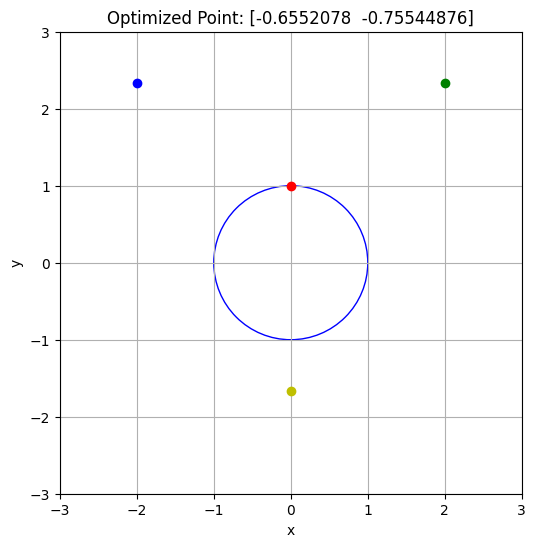

In [15]:
import torch
import matplotlib.pyplot as plt

# Define the SDF for a circle with radius 1 centered at the origin
def sdf_circle(x,y):
    radius = 1.0
    return torch.sqrt(x**2 + y**2) - radius

# Initialize the source points (p1, p2, p3) as PyTorch tensors
p1 = torch.tensor([2.0, 2.0], requires_grad=True)
p2 = torch.tensor([-2.0, 2.0], requires_grad=True)
p3 = torch.tensor([0.0, -2.0], requires_grad=True)

# Function to compute the weighted average point (x, y)
def compute_xy(p1, p2, p3):
    x = (p1[0] + p2[0] + p3[0])/3
    y = (p1[1] + p2[1] + p3[1])/3
    return x,y

print("initial vertex position",compute_xy(p1, p2, p3))

# Define the optimizer
optimizer = torch.optim.Adam([p1, p2, p3], lr=0.1)

# Optimization loop
for step in range(1000):
    optimizer.zero_grad()
    
    # Compute the point (x, y) from the source points and weights
    x,y = compute_xy(p1, p2, p3)
    
    # Calculate the SDF value at the current point
    distance = sdf_circle(x,y)
    # Define the loss as the squared distance
    loss = distance**2
    
    # Backpropagation
    loss.backward()
    
    # Optimization step
    optimizer.step()
    
    # Print progress every 100 steps
    if step % 100 == 0:
        print(f'Step {step}, Point: {x,y}, Loss: {loss.item()}, distance: {distance.item()}')


# Final optimized point
x,y = compute_xy(p1, p2, p3)
print(f'Optimized Point: {x,y}')
print(f'Optimized p1: {p1.detach().numpy()}')
print(f'Optimized p2: {p2.detach().numpy()}')
print(f'Optimized p3: {p3.detach().numpy()}')

# Plot the result
plt.figure(figsize=(6, 6))
circle = plt.Circle((0, 0), 1, color='blue', fill=False)
plt.gca().add_artist(circle)
plt.plot(x.detach().numpy(), y.detach().numpy(), 'ro')  # Final optimized point
plt.plot(p1.detach().numpy()[0], p1.detach().numpy()[1], 'go')  # Final p1
plt.plot(p2.detach().numpy()[0], p2.detach().numpy()[1], 'bo')  # Final p2
plt.plot(p3.detach().numpy()[0], p3.detach().numpy()[1], 'yo')  # Final p3
plt.xlim(-3, 3)
plt.ylim(-3, 3)
plt.gca().set_aspect('equal', adjustable='box')
plt.title(f'Optimized Point: {optimized_point}')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.show()
